In [11]:
import numpy as np
import matplotlib.pyplot as plt

[[ 0.          0.        ]
 [ 0.          1.        ]
 [-0.70710678  0.29289322]]
[[ 0.          0.        ]
 [ 0.38268343  0.92387953]
 [-0.32442335  0.21677275]]
[[ 0.          0.        ]
 [ 0.38268343  0.92387953]
 [-0.51876332  0.49098954]]
[[ 0.          0.        ]
 [ 0.40794094  0.91300832]
 [-0.49350581  0.48011832]]
[[ 0.          0.        ]
 [ 0.40794094  0.91300832]
 [-0.50230922  0.49894957]]


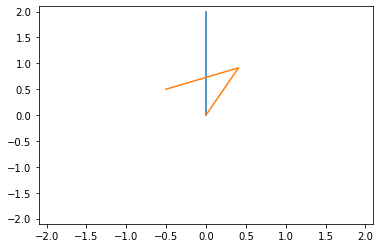

In [71]:
def vector_angles(vector_1, vector_2):
    unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
    unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle = np.arccos(dot_product)
    return angle

lengths = np.array([1, 1])
X, Y, Z = 1, 1, 1

jm_start = jm = np.array([[0, 0],         # joint 0 (base)
                          [0, 1],         # joint 1
                          [0, 2]])        # joint 2 (end effector)

m_angles = [0, 0]


target_end = np.array([-0.5,0.5])            # where the end of the arm should be

index = len(jm[1,:])-1
while np.linalg.norm(jm[2,:] - target_end) > 0.01:
    current_vector = jm[2,:] - jm[index,:]
    target_vector = target_end - jm[index,:]

    angle = vector_angles(current_vector, target_vector)
    crossResult = np.cross(target_vector, current_vector)
    if crossResult > 0:
        m_angles[index] += angle
    else:
        m_angles[index] -= angle

    # update postions
    jm = ([0, 0])
    for i in range(len(m_angles)):
        temp = lengths[i] * np.array([np.sin(m_angles[i]), np.cos(m_angles[i])])
        temp += jm[len(jm)-1]
        jm = np.vstack((jm, temp))
        
    
    # update index
    if index == 0: index = len(jm[1,:])-1
    else: index -= 1

    print(jm)





plt.plot(jm_start[:, 0], jm_start[:, 1])
plt.plot(jm[:, 0], jm[:, 1])
plt.xlim([-2.1, 2.1])
plt.ylim([-2.1, 2.1])
plt.show()


In [48]:
m_angles = np.array([0, 0])
update_joints_pos(m_angles, [1, 1])

[[0 0]]
[[0. 0.]
 [0. 1.]]
[[0. 0.]
 [0. 1.]
 [0. 2.]]
